In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers.shear_helpers as sh
#New Push

In [2]:
load_position = [-52, -228, -392, -568, -732, -908]
P = [-91, -91, -67.5, -67.5, -67.5, -67.5]
max_length = 1250
reaction_locations = (25, 1225)
train_length = 909

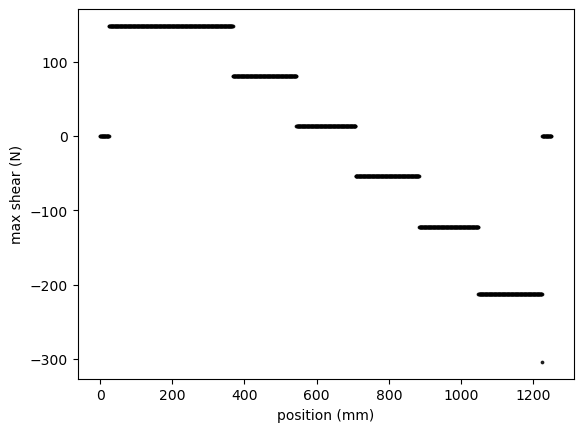

-303.7900995024877


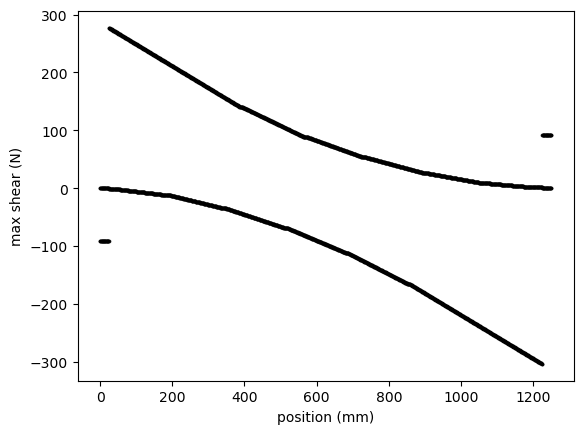

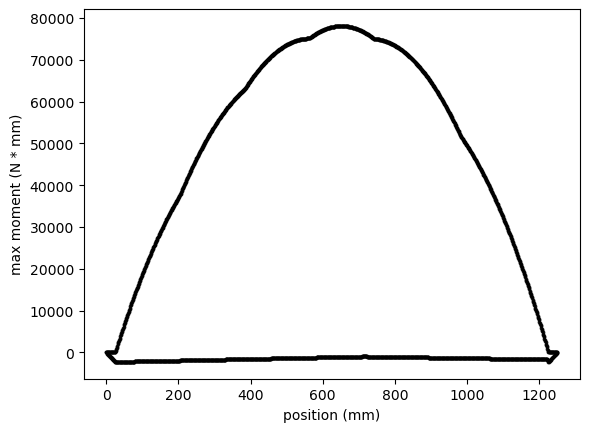

192.27990049751236
-219.41676616915436
-303.7900995024877
78097.75184079695
46390.29477611936


In [7]:
loads_mag = sh.get_loads(-452)
loads = sh.find_loads(1276, loads_mag, load_position, max_length)
reactions = sh.find_reaction(loads,reaction_locations)
shear = {k: loads.get(k, 0) + reactions.get(k, 0) for k in set(loads) | set(reactions)}
shears = sh.find_shear(shear, max_length)
moments = sh.find_moment(shear, max_length)
sh.plot(shears, "position (mm)", "max shear (N)", "images/shear_test.png")
print(min(list(shears.values())))
envelope_shear = sh.envelope(sh.find_shear, -452, load_position, reaction_locations, max_length, train_length)
envelope_moment = sh.envelope(sh.find_moment, -452, load_position, reaction_locations, max_length, train_length)
sh.plot_envelope(envelope_shear[0],envelope_shear[2],  "position (mm)", "max shear (N)", "images/shear.png")
sh.plot_envelope(envelope_moment[0],envelope_moment[2],  "position (mm)", "max moment (N * mm)", "images/moment.png")

print(envelope_shear[0][250])
print(envelope_shear[2][1000])
print(min(list(envelope_shear[2].values())))
print(max(list(envelope_moment[0].values())))
print(envelope_moment[0][250])